In [4]:
import os
import pickle
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import warnings

import seaborn as sns
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
folder_path = "data/"
file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(".pkl")]

 

In [ ]:
color_map = {
    "EDD": "steelblue",
    "SPT": "mediumseagreen",
    "LPT": "darkorange",
    "CR": "indianred",
    "SLACK": "mediumpurple",
    "UNKNOWN": "gray"
}

short_names = {
    "ALGORITHM_EDD": "EDD",
    "ALGORITHM_SPT": "SPT",
    "ALGORITHM_LPT": "LPT",
    "ALGORITHM_CRITICAL_RATIONAL": "CR",
    "ALGORITHM_SLACK": "SLACK"
}



rows = []
for path in file_paths:
    try:
        with open(path, "rb") as file:
            data = pickle.load(file)
            days = data.get("SIMULATION_DAYS_ARRAY_KEY", [])
            rows.append({
                'ALGORITHM': data.get("ALGORITHM_KEY", "UNKNOWN"),
                "GET_NEXT_ORDER_BY_KEY": data.get("GET_NEXT_ORDER_BY_KEY", "UNKNOWN"),
                "INCOME": days[-1].get('TOTAL_INCOME', 0),
            })
    except Exception as e:
        print(f"Problem with file {path}: {e}")

df = pd.DataFrame(rows)
df.head()



,ALGORITHM,GET_NEXT_ORDER_BY_KEY,INCOME
0,ALGORITHM_EDD,GET_NEXT_ORDER_BY_DUE_DATE,100.978852
1,ALGORITHM_SPT,GET_NEXT_ORDER_BY_DUE_DATE,310.447242
2,ALGORITHM_LPT,GET_NEXT_ORDER_BY_DUE_DATE,220.403978
3,ALGORITHM_SLACK,GET_NEXT_ORDER_BY_DUE_DATE,160.294551
4,ALGORITHM_CRITICAL_RATIONAL,GET_NEXT_ORDER_BY_DUE_DATE,333.238529


In [10]:
# Create the bar plot
plt.figure(figsize=(12, 6))
bar = sns.barplot(
    data=df,
    x="ALGORITHM",
    y="INCOME",
    hue="GET_NEXT_ORDER_BY_KEY"
)

# Add labels and title
plt.title("Income by Algorithm and Order Strategy", fontsize=14)
plt.xlabel("Algorithm", fontsize=12)
plt.ylabel("Income", fontsize=12)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `INCOME` for `y`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [7]:
rows = []

for path in file_paths:
    try:
        with open(path, "rb") as file:
            data = pickle.load(file)
            days = data.get("SIMULATION_DAYS_ARRAY_KEY", [])
            rows.append({
                'ALGORITHM': data.get("ALGORITHM_KEY", "UNKNOWN"),
                "GET_NEXT_ORDER_BY_KEY": data.get("GET_NEXT_ORDER_BY_KEY", "UNKNOWN"),
                "order_fulfilled": sum(list(map(lambda x: len(x.get("ORDER_FULFILLED_LIST", [])), days))),
            })
    except Exception as e:
        print(f"Problem with file {path}: {e}")

df = pd.DataFrame(rows)
df.head()



,ALGORITHM,GET_NEXT_ORDER_BY_KEY,order_fulfilled
0,ALGORITHM_EDD,GET_NEXT_ORDER_BY_DUE_DATE,598
1,ALGORITHM_SPT,GET_NEXT_ORDER_BY_DUE_DATE,600
2,ALGORITHM_LPT,GET_NEXT_ORDER_BY_DUE_DATE,599
3,ALGORITHM_SLACK,GET_NEXT_ORDER_BY_DUE_DATE,599
4,ALGORITHM_CRITICAL_RATIONAL,GET_NEXT_ORDER_BY_DUE_DATE,600


In [17]:
days[170]

{'DAY_KEY': 171,
 'CUSTOMER_ORDERS_KEY': [{'customer_id': 0,
   'max_lead_time': 2,
   'order_cost': 20,
   'orders': [{'order_id': '0_2_2',
     'products': [({'product_id': 'A',
        'volume_per_unit': 1.0,
        'cost': 4.4e-323},
       7),
      ({'product_id': 'B', 'volume_per_unit': 1.5, 'cost': 4.4e-323}, 11)],
     'due_time': 2,
     'status': 'INGREDIENTS_ORDERED',
     'created_at': 2},
    {'order_id': '0_3_3',
     'products': [({'product_id': 'B',
        'volume_per_unit': 1.5,
        'cost': 4.4e-323},
       3)],
     'due_time': 2,
     'status': 'INGREDIENTS_ORDERED',
     'created_at': 3},
    {'order_id': '0_4_4',
     'products': [({'product_id': 'A',
        'volume_per_unit': 1.0,
        'cost': 4.4e-323},
       7),
      ({'product_id': 'B', 'volume_per_unit': 1.5, 'cost': 4.4e-323}, 10)],
     'due_time': 2,
     'status': 'WAITING',
     'created_at': 4},
    {'order_id': '0_7_4',
     'products': [({'product_id': 'A',
        'volume_per_unit': 1.0,

In [ ]:
rows = []

for path in file_paths:
    try:
        with open(path, "rb") as file:
            data = pickle.load(file)
            days = data.get("SIMULATION_DAYS_ARRAY_KEY", [])
            rows.append({
                'ALGORITHM': data.get("ALGORITHM_KEY", "UNKNOWN"),
                "GET_NEXT_ORDER_BY_KEY": data.get("GET_NEXT_ORDER_BY_KEY", "UNKNOWN"),
                "order_fulfilled": sum(list(map(lambda x: len(x.get("ORDER_FULFILLED_LIST", [])), days))),
            })
    except Exception as e:
        print(f"Problem with file {path}: {e}")

df = pd.DataFrame(rows)
df.head()



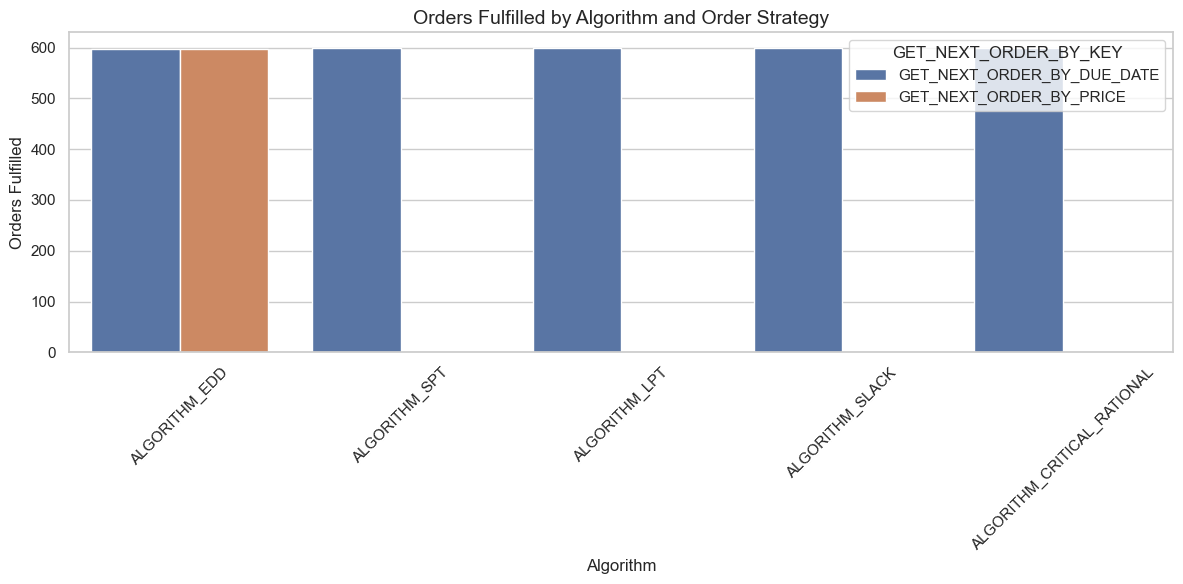

In [12]:
plt.figure(figsize=(12, 6))
bar = sns.barplot(
    data=df,
    x="ALGORITHM",
    y="order_fulfilled",
    hue="GET_NEXT_ORDER_BY_KEY"
)

# Add labels and title
plt.title("Orders Fulfilled by Algorithm and Order Strategy", fontsize=14)
plt.xlabel("Algorithm", fontsize=12)
plt.ylabel("Orders Fulfilled", fontsize=12)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [1]:
[0 , 1 , 2, 3, 4, 5, 6, 7, 8, 9, 10][0:4]

[0, 1, 2, 3]

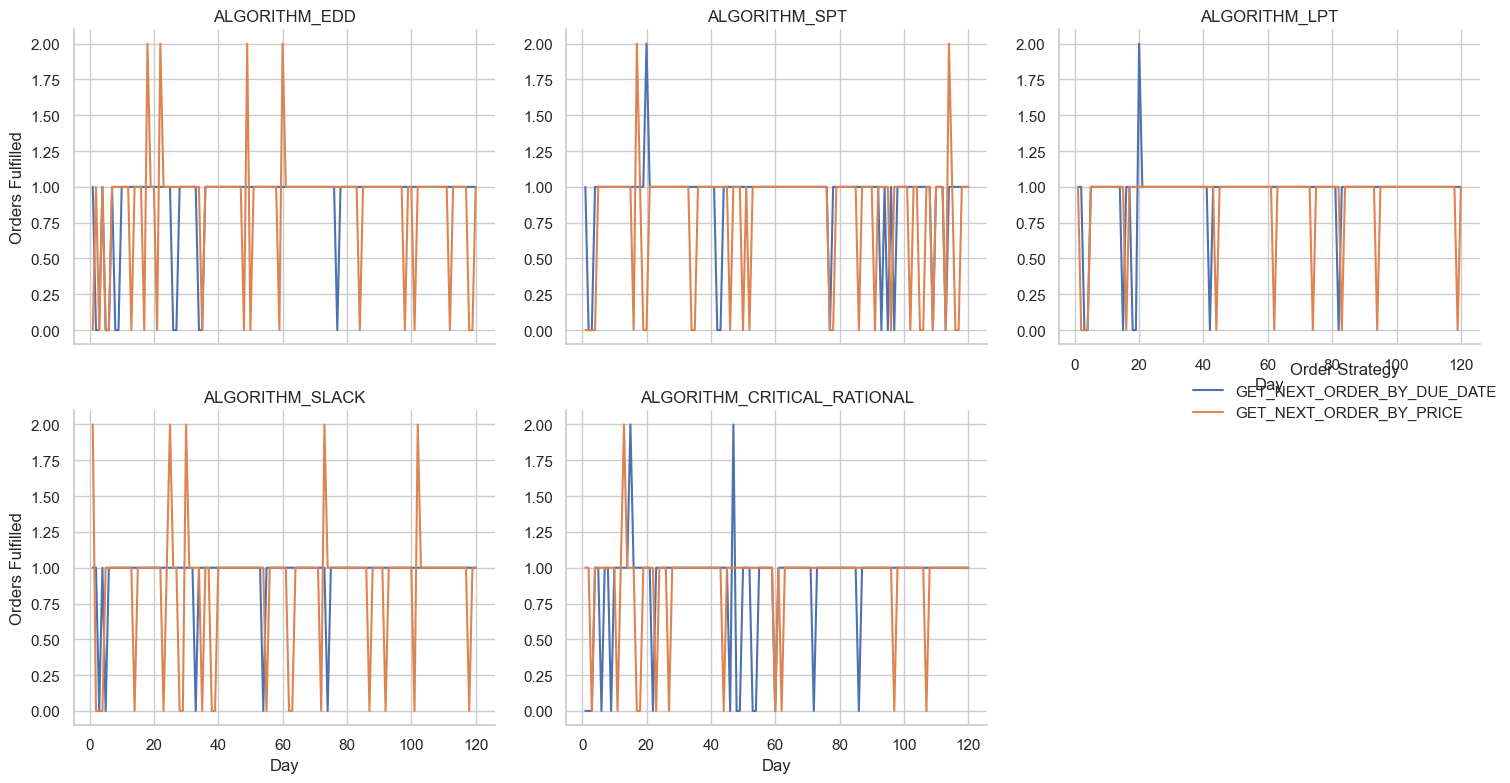

In [12]:
rows = []

for path in file_paths:
    try:
        with open(path, "rb") as file:
            data = pickle.load(file)
            days = data.get("SIMULATION_DAYS_ARRAY_KEY", [])
            for day in days:
                rows.append({
                    'ALGORITHM': data.get("ALGORITHM_KEY", "UNKNOWN"),
                    "GET_NEXT_ORDER_BY_KEY": data.get("GET_NEXT_ORDER_BY_KEY", "UNKNOWN"),
                    'day': day.get('DAY_KEY', 0),
                    "order_fulfilled": len(day.get("ORDER_FULFILLED_LIST", [])),
                })
    except Exception as e:
        print(f"Problem with file {path}: {e}")

df = pd.DataFrame(rows)
df.head()

# df.to_clipboard()
g = sns.FacetGrid(df, col="ALGORITHM", col_wrap=3, height=4, sharey=False)

# Draw a lineplot on each subplot
g.map_dataframe(sns.lineplot, x="day", y="order_fulfilled", hue="GET_NEXT_ORDER_BY_KEY")

# Add titles and layout
g.add_legend(title="Order Strategy")
g.set_axis_labels("Day", "Orders Fulfilled")
g.set_titles(col_template="{col_name}")
plt.tight_layout()
plt.show()

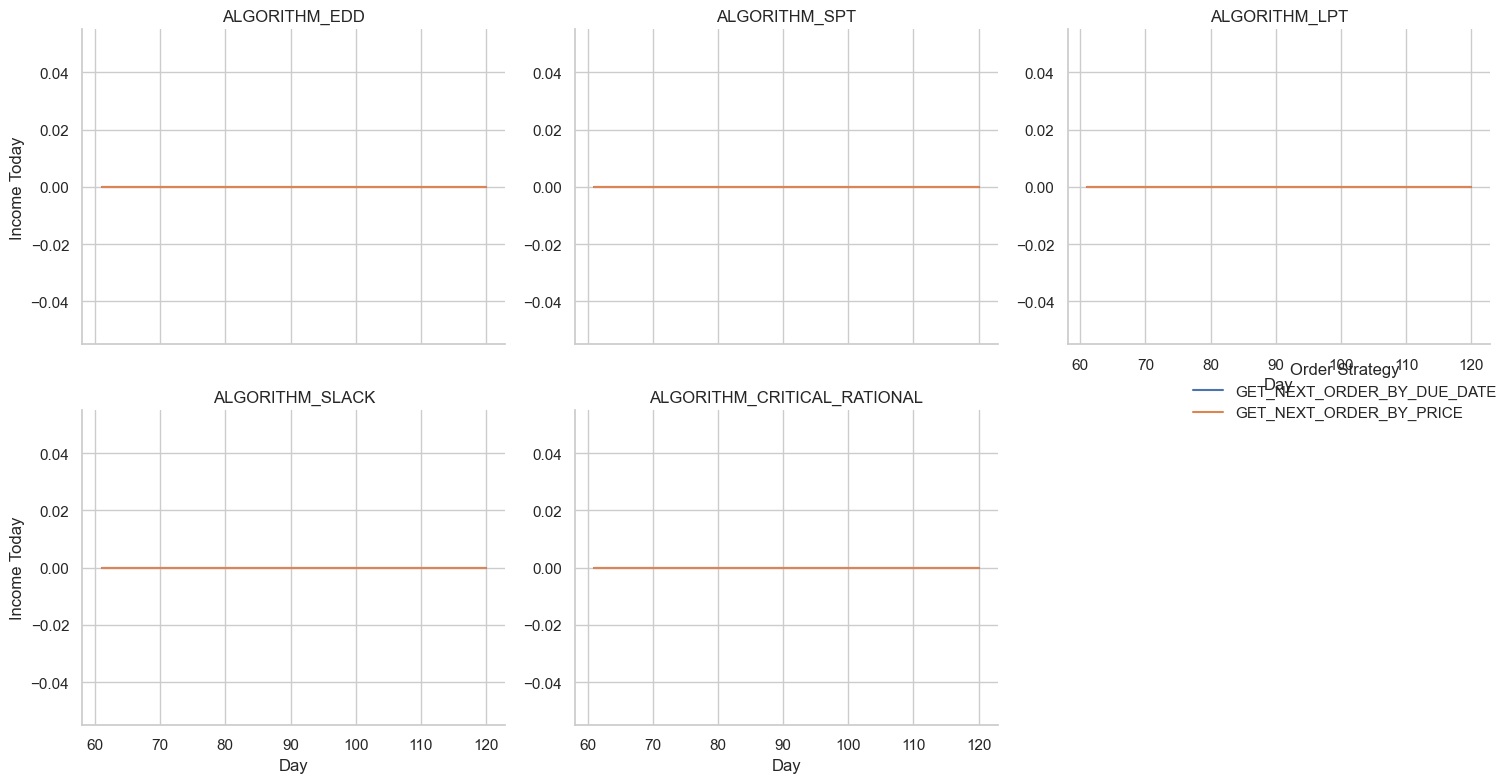

In [15]:
rows = []

cool_down = 60
for path in file_paths:
    try:
        with open(path, "rb") as file:
            data = pickle.load(file)
            days = data.get("SIMULATION_DAYS_ARRAY_KEY", [])
            init_money = days[cool_down - 1].get('TOTAL_INCOME', 0) if len(days) > cool_down else 0
            for day in days[cool_down:]:
                rows.append({
                    'ALGORITHM': data.get("ALGORITHM_KEY", "UNKNOWN"),
                    "GET_NEXT_ORDER_BY_KEY": data.get("GET_NEXT_ORDER_BY_KEY", "UNKNOWN"),
                    'day': day.get('DAY_KEY', 0),
                    "income_today": day.get('TOTAL_INCOME' ) - init_money,
                })
                init_money = day.get('TOTAL_INCOME', 0)
    except Exception as e:
        print(f"Problem with file {path}: {e}")

df = pd.DataFrame(rows)
df.head()


# df.to_clipboard()
g = sns.FacetGrid(df, col="ALGORITHM", col_wrap=3, height=4, sharey=False)

# Draw a lineplot on each subplot
g.map_dataframe(sns.lineplot, x="day", y="income_today", hue="GET_NEXT_ORDER_BY_KEY")

# Add titles and layout
g.add_legend(title="Order Strategy")
g.set_axis_labels("Day", "Income Today")
g.set_titles(col_template="{col_name}")
plt.tight_layout()
plt.show()
